# Simulation Bimulation

In [33]:
import matplotlib.pyplot as plt
import random

class FinancialSimulation:
    def __init__(self, months):
        self.monthly_incomes = []
        self.monthly_expenses = []
        self.net_worths = []
        self.months = months
        self.life_events = {}
        self.life_events_timeline = [0]  * months 

    def add_life_event(self, month, event):
        """ Adds a life event at a specific month """
        self.life_events[month] = event
        self.life_events_timeline[month - 1] = event["scenario"]

    def income(self, monthly_salary, investment, historical_returns, monthly_other_income=0):
        total_investments = 0
        for month in range(self.months):
            year = month // 12
            fluctuation = 1 + random.uniform(-0.05, 0.05)
            current_salary = monthly_salary * fluctuation
            
            if month in self.life_events:
                current_salary += self.life_events[month].get("income", 0)
            
            # Investment returns
            investment_return_rate = historical_returns[year % len(historical_returns)]
            monthly_investment_return = total_investments * (investment_return_rate / 12)
            total_investments += investment
            
            total_income = current_salary + monthly_investment_return + monthly_other_income
            self.monthly_incomes.append(total_income)

    def expenses(self, monthly_tax, monthly_rent, monthly_mortgage, monthly_other_expenses):
        for month in range(self.months):
            fluctuation = 1 + random.uniform(-0.03, 0.03)
            monthly_expenses = (monthly_tax + monthly_rent + monthly_mortgage + monthly_other_expenses) * fluctuation
            
            if month in self.life_events:
                monthly_expenses += self.life_events[month].get("expenses", 0)
                
            self.monthly_expenses.append(monthly_expenses)

    def calculate_net_worth(self):
        for month in range(self.months):
            if month == 0:
                self.net_worths.append(self.monthly_incomes[month] - self.monthly_expenses[month])
            else:
                self.net_worths.append(self.net_worths[month - 1] + self.monthly_incomes[month] - self.monthly_expenses[month])

    def plot_simulation(self, years):
        plt.plot(range(self.months), self.monthly_incomes, label='Income', color='green')
        plt.plot(range(self.months), self.monthly_expenses, label='Expenses', color='red')
        plt.plot(range(self.months), self.net_worths, label='Net Worth', color='blue')
        
        # X axis ticks to represent years
        plt.xticks([i*12 for i in range(years)], [str(i+1) for i in range(years)])
        
        plt.xlabel('Years')
        plt.ylabel('Amount ($)')
        plt.title('Financial Simulation over Years (Monthly Data)')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

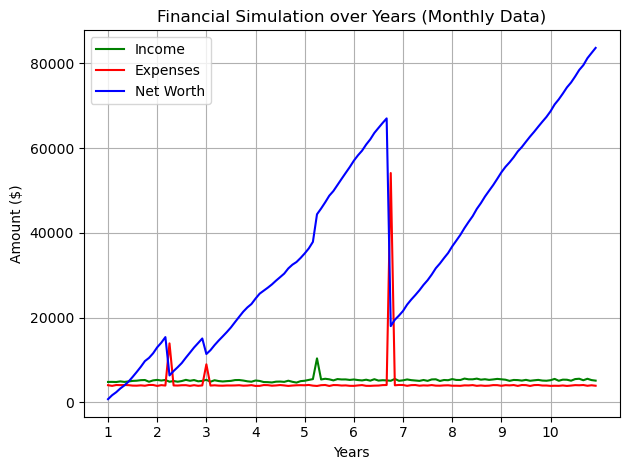

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 'car accident', 0, 0, 0, 0, 0, 0, 0, 0, 'rock climbing accident', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 'bonus from work', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 'home repairs', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [39]:
years = 10
months = years * 12
monthly_salary = 5000
investment = 500
# Example historical S&P 500 returns over the last 10 years
historical_returns = [0.10, 0.12, 0.08, -0.04, 0.15, 0.11, 0.09, 0.14, 0.06, 0.07]

monthly_tax = 0.3 * monthly_salary
monthly_rent = 1000
monthly_mortgage = 500
monthly_other_expenses = 1000

sim = FinancialSimulation(months)
sim.add_life_event(24, {"scenario":"rock climbing accident","income": 0, "expenses": 5000})
sim.add_life_event(15, {"scenario":"car accident","income": 0, "expenses": 10000})
sim.add_life_event(51, {"scenario":"bonus from work","income": 5000, "expenses": 0})
sim.add_life_event(64, {"scenario":"inheritance","income": 100000, "expenses": 40000})
sim.add_life_event(69, {"scenario":"home repairs","income": 0, "expenses": 50000})# Example life event at month 24

sim.income(monthly_salary, investment, historical_returns)
sim.expenses(monthly_tax, monthly_rent, monthly_mortgage, monthly_other_expenses)
sim.calculate_net_worth()
sim.plot_simulation(years)

print(sim.life_events_timeline)

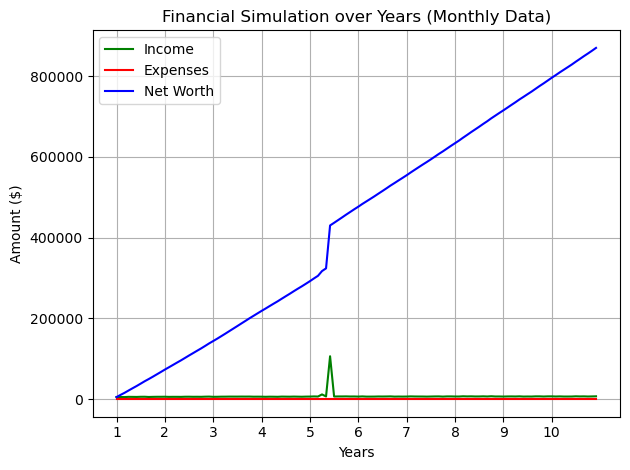

In [48]:
import matplotlib.pyplot as plt
import random

class FinancialSimulation:
    def __init__(self, months):
        self.monthly_incomes = []
        self.monthly_expenses = []
        self.net_worths = []
        self.months = months
        self.life_events = {}
        self.life_events_timeline = [0]  * months 
        self.quirks = []

    def adjust_salary(self, salary, month, percentage_increase):
        return salary * (1 + percentage_increase / (month + 1))

    def apply_quirks(self, monthly_income, monthly_expenses):
        for quirk in self.quirks:
            monthly_income += quirk.get("income_modifier", 0)
            monthly_expenses += quirk.get("expenses_modifier", 0)
        return monthly_income, monthly_expenses

    def add_life_event(self, month, event):
        """ Adds a life event at a specific month """
        self.life_events[month] = event
        self.life_events_timeline[month - 1] = event["scenario"]

    def income(self, monthly_salary, investment, historical_returns, annual_salary_increase, monthly_other_income=0):
        total_investments = 0
        for month in range(self.months):
            monthly_salary = self.adjust_salary(monthly_salary, month, annual_salary_increase)
            fluctuation = 1 + random.uniform(-0.05, 0.05)
            current_salary = monthly_salary * fluctuation

            if month in self.life_events:
                current_salary += self.life_events[month].get("income", 0)

            # Investment returns
            year = month // 12
            investment_return_rate = historical_returns[year % len(historical_returns)]
            monthly_investment_return = total_investments * (investment_return_rate / 12)
            total_investments += investment

            total_income = current_salary + monthly_investment_return + monthly_other_income
            self.monthly_incomes.append(total_income)

    def expenses(self, base_expenses):
        for month in range(self.months):
            monthly_expenses = base_expenses * (self.monthly_incomes[month] / self.monthly_incomes[0])

            if month in self.life_events:
                monthly_expenses += self.life_events[month].get("expenses", 0)

            monthly_expenses, _ = self.apply_quirks(0, monthly_expenses)
            self.monthly_expenses.append(monthly_expenses)

    def calculate_net_worth(self):
        for month in range(self.months):
            if month == 0:
                self.net_worths.append(self.monthly_incomes[month] - self.monthly_expenses[month])
            else:
                self.net_worths.append(self.net_worths[month - 1] + self.monthly_incomes[month] - self.monthly_expenses[month])

    def plot_simulation(self, years):
        plt.plot(range(self.months), self.monthly_incomes, label='Income', color='green')
        plt.plot(range(self.months), self.monthly_expenses, label='Expenses', color='red')
        plt.plot(range(self.months), self.net_worths, label='Net Worth', color='blue')

        # X axis ticks to represent years
        plt.xticks([i*12 for i in range(years)], [str(i+1) for i in range(years)])

        plt.xlabel('Years')
        plt.ylabel('Amount ($)')
        plt.title('Financial Simulation over Years (Monthly Data)')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

def main():
    years = 10
    months = years * 12
    monthly_salary = 5000
    investment = 500
    annual_salary_increase = 0.05  # 5% annual increase

    # Example historical S&P 500 returns over the last 10 years
    historical_returns = [0.10, 0.12, 0.08, -0.04, 0.15, 0.11, 0.09, 0.14, 0.06, 0.07]
    
    sim = FinancialSimulation(months)
    sim.quirks = [
        {"name": "sushi enjoyer", "expenses_modifier": 50},
        {"name": "frugal", "expenses_modifier": -100},
        {"name": "gambler", "income_modifier": random.uniform(-500, 500), "expenses_modifier": random.uniform(-500, 500)}
    ]
    sim.add_life_event(15, {"scenario":"rock climbing accident","income": 0, "expenses": 5000, "income_effect": -0.1, "expenses_effect": 0.05})
    sim.add_life_event(24, {"scenario":"major career switch","income": 0, "expenses": 2000, "income_effect": 0.2, "expenses_effect": 0})
    sim.add_life_event(38, {"scenario":"car accident","income": 0, "expenses": 10000, "income_effect": 0, "expenses_effect": 0.10})
    sim.add_life_event(51, {"scenario":"bonus from work","income": 5000, "expenses": 0, "income_effect": 0, "expenses_effect": 0})
    sim.add_life_event(53, {"scenario":"inheritance","income": 100000, "expenses": 40000, "income_effect": 0, "expenses_effect": 0})
    sim.add_life_event(90, {"scenario":"home repairs","income": 0, "expenses": 50000, "income_effect": -0.1, "expenses_effect": 0.05})

    base_expenses = 0.3 * monthly_salary + 1000 + 500 + 1000  # tax + rent + mortgage + other expenses
    sim.income(monthly_salary, investment, historical_returns, annual_salary_increase)
    sim.expenses(base_expenses)
    sim.calculate_net_worth()
    sim.plot_simulation(years)

if __name__ == '__main__':
    main()